## Image Transformation on baboon.png (RGB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
lenna_image=cv2.imread("baboon.png")
print(lenna_image)

[[[ 71 150 164]
  [ 31  57  63]
  [ 10  43  75]
  ...
  [ 68 119 117]
  [101 170 141]
  [118 188 179]]

 [[ 62 125 120]
  [ 33  97 135]
  [ 23  35  55]
  ...
  [ 98 140 122]
  [128 159 136]
  [ 74 138 120]]

 [[ 31  74  99]
  [ 46 118 132]
  [ 36  41  60]
  ...
  [ 90  93 118]
  [ 77  91  87]
  [ 49  80  96]]

 ...

 [[155 148 121]
  [150 156 123]
  [139 150 124]
  ...
  [ 60  73 110]
  [ 70  93  90]
  [ 60  80  81]]

 [[168 169 126]
  [151 151 117]
  [133 136 121]
  ...
  [ 68  84  73]
  [ 86  69  99]
  [ 71  63  80]]

 [[ 12  11   9]
  [ 11  12  10]
  [ 12  15  11]
  ...
  [  5   8   5]
  [  0   5   2]
  [  2   5   4]]]


In [4]:
# Helper function to show images side-by-side
def plot_image(images, titles, cmap=None):
    plt.figure(figsize=(16, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

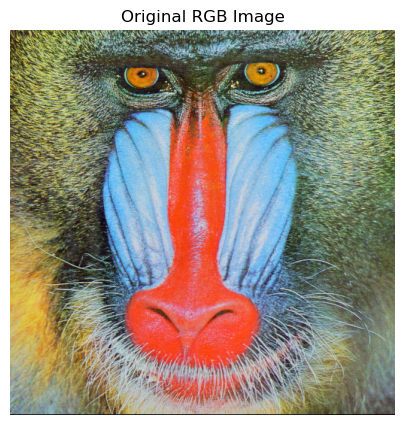

In [5]:
# Load the image in RGB
img = cv2.imread('baboon.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Show the original
plot_image([img_rgb], ["Original RGB Image"])

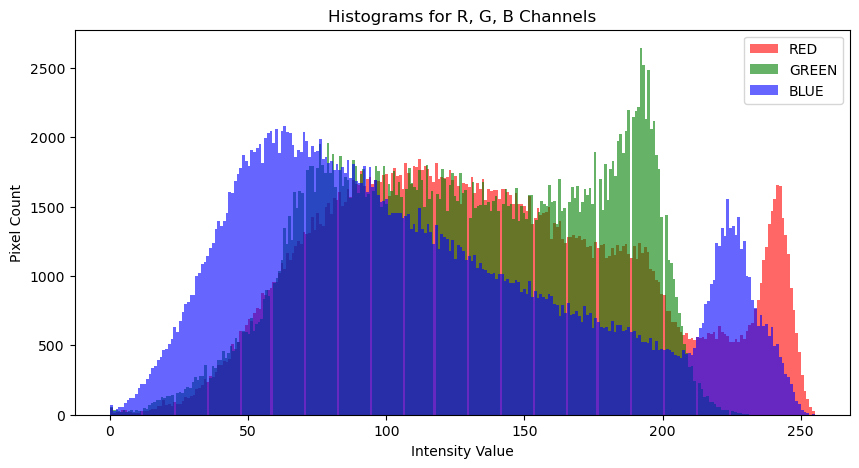

In [6]:
# Split channels
r, g, b = cv2.split(img_rgb)

# Plot histograms
plt.figure(figsize=(10, 5))
colors = ['red', 'green', 'blue']
for channel, color in zip([r, g, b], colors):
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.6, label=f'{color.upper()}')
plt.title("Histograms for R, G, B Channels")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()

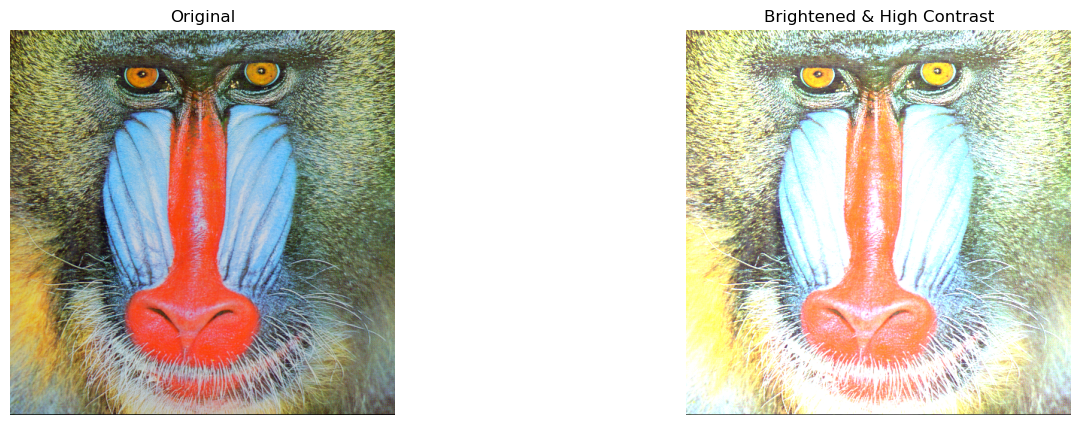

In [7]:
# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, brightness=30, contrast=30):
    new_img = cv2.convertScaleAbs(image, alpha=1 + contrast/100.0, beta=brightness)
    return new_img

bright_contrast_img = adjust_brightness_contrast(img_rgb, brightness=40, contrast=50)

plot_image([img_rgb, bright_contrast_img], ["Original", "Brightened & High Contrast"])

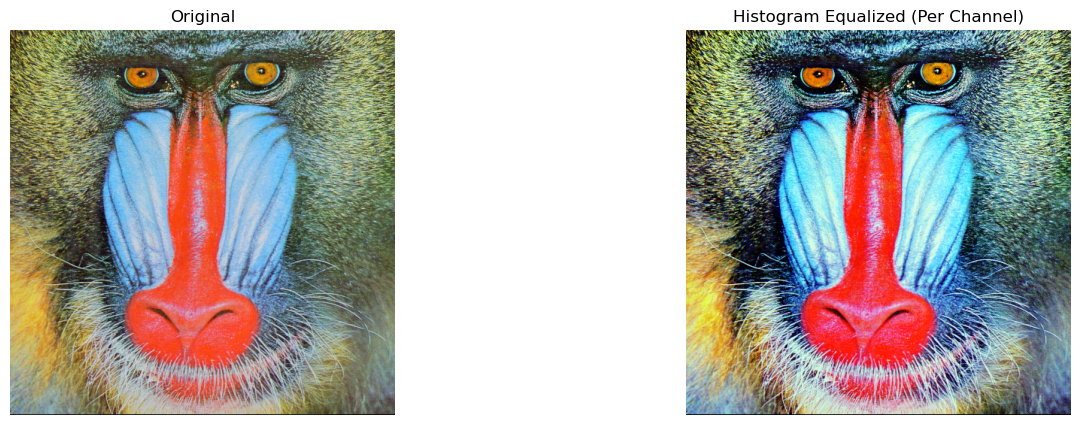

In [8]:
# Equalize each channel separately
equalized_r = cv2.equalizeHist(r)
equalized_g = cv2.equalizeHist(g)
equalized_b = cv2.equalizeHist(b)

equalized_rgb = cv2.merge([equalized_r, equalized_g, equalized_b])

plot_image([img_rgb, equalized_rgb], ["Original", "Histogram Equalized (Per Channel)"])

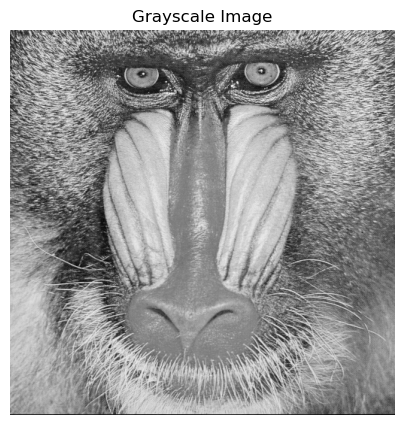

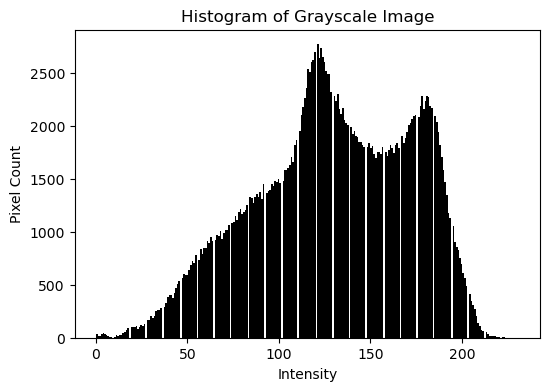

In [9]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Show grayscale image and its histogram
plot_image([gray], ["Grayscale Image"], cmap='gray')

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(gray.ravel(), bins=256, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

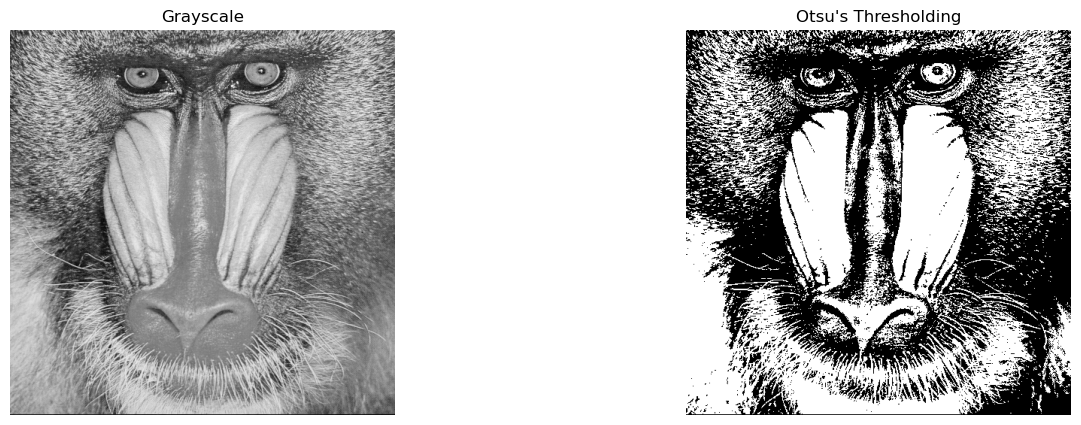

Otsu Threshold Value: 128.0


In [10]:
# Apply Otsu’s Thresholding
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plot_image([gray, otsu_thresh], ["Grayscale", "Otsu's Thresholding"], cmap='gray')

print("Otsu Threshold Value:", _)

## Task Is Done